# Linear Regression Problem

In this problem, we have a dataset which contains several parameters which affect the prices of house
We have to use the data in order to train ML model and predict the price of the house based on the learnings of the model

## Importing required libraries and modules 

In [2]:
# used to split the dataset into testing and training data
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# another data visualisation package based on matplotlib
import seaborn as sns  
# Seaborn is a Python data visualization library based on matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics

## Reading data from file

In [4]:
df = pd.read_csv("USA_housing.csv")
df.head()
# df.info()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Checking correlations using heatmap

<AxesSubplot:>

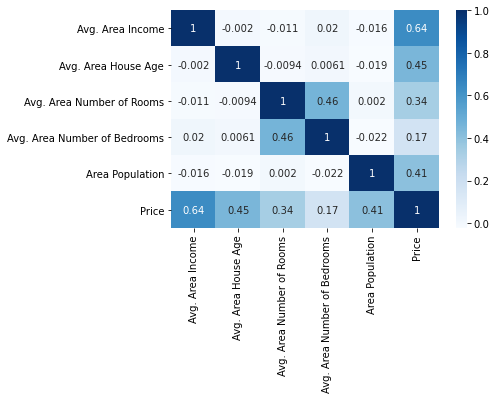

In [8]:
# heatmap of correlation
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
# this can be used to drop or include data columns for training

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Preparing Dataset for Inputs and Outputs

In [12]:
# excluding address from the data as it is of text type
# excluding the price from the data as it will be used as label and is dependent variable 
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
# preparing label
Y = df["Price"]

## Splitting data for training

In [14]:
#X_train is data for training
#X_test is data for testing
# Y_train are labels for training
# Y_test are labels for testing with which we will compare our predictions
# split happens randomly, so the random state has been fixed so that we get exactly same model whenever
# Splitting data such that 30% of data is test data and 70% is training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

## Importing Linear Regression model from skLearn

In [15]:
# as linear regression falls into linear model family
from sklearn.linear_model import LinearRegression

In [16]:
# initialising estimator
lm = LinearRegression(fit_intercept = True)

## Training data

In [17]:
# using fit function to train model using training data and labels
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
print(lm.intercept_)

-2638163.6232778165


In [19]:
print(lm.coef_)

[2.15985144e+01 1.65641394e+05 1.20514981e+05 4.78556603e+02
 1.53645374e+01]


In [20]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [21]:
# creating new data frame will show that upon the change of one unit of each parameter, what will 
# be the change on house price...this is done using coefficients
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
# X_train and Xhave same columns, so anyone of these can be used

In [22]:
coef

,Coeff
Avg. Area Income,21.598514
Avg. Area House Age,165641.393655
Avg. Area Number of Rooms,120514.980789
Avg. Area Number of Bedrooms,478.556603
Area Population,15.364537


## Getting Predictions

In [23]:
# predicting by running model on test data
predictions = lm.predict(X_test)

In [25]:
(pd.DataFrame ({"Actual": y_test, "Predicted": predictions}).reset_index())

,index,Actual,Predicted
0,245,1.118048e+06,1.194183e+06
1,4493,1.326947e+06,1.186927e+06
2,4583,1.053485e+06,1.046823e+06
3,2242,7.590447e+05,8.284604e+05
4,3407,1.381118e+06,1.485870e+06
...,...,...,...
1495,2257,1.168994e+06,1.324400e+06
1496,1146,9.289500e+05,1.096720e+06
1497,134,1.760735e+06,1.490906e+06
1498,997,1.367641e+06,1.271225e+06


## Scatter plot

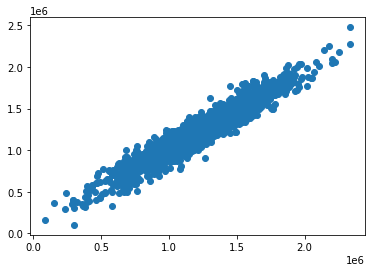

In [26]:
plt.scatter(y_test, predictions)

## Regression Evaluation Metrics

In [33]:
from sklearn import metrics

R_2 = metrics.r2_score(y_test, predictions)

print("R^2", R_2)
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2 0.9159275718398607
MAE 81349.24091898996
MSE 10408992254.120796
RMSE 102024.46889898911


## Resetting test data index as it was picked up from random indexes

In [34]:
sorted_test_data = y_test.reset_index()
sorted_test_data

,index,Price
0,245,1.118048e+06
1,4493,1.326947e+06
2,4583,1.053485e+06
3,2242,7.590447e+05
4,3407,1.381118e+06
...,...,...
1495,2257,1.168994e+06
1496,1146,9.289500e+05
1497,134,1.760735e+06
1498,997,1.367641e+06


## Plotting Predicted Prices vs. Actual prices for Test Data

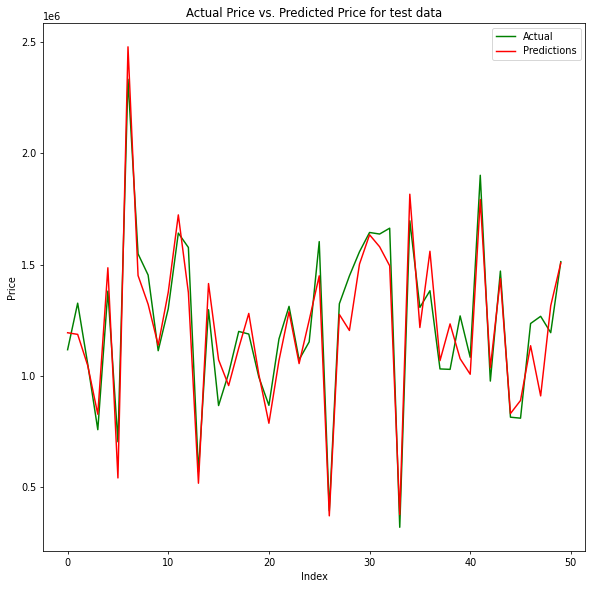

In [35]:
plt.subplots(figsize = (10,10), dpi = 70)
# dpi = resolution in dots per inch
plt.plot(sorted_test_data["Price"][0:50], "g", label = "Actual")   #plotting 1st 50 data points
plt.plot(predictions[0:50], "r",label = "Predictions")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual Price vs. Predicted Price for test data")
plt.legend()
